In [28]:
#load dotenv
import dotenv
dotenv.load_dotenv()
#take screenshot using pil
from PIL import Image
from PIL import ImageGrab
import os
import base64
from langchain_openai import ChatOpenAI
from langchain.agents import tool

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


from langchain_core.prompts import MessagesPlaceholder
from langchain_core.messages import HumanMessage
LOGDIR = "log/img"

os.makedirs(LOGDIR,exist_ok=True)
# ss_region = (300, 150, 850, 750)
# ss_img = ImageGrab.grab(ss_region)
# ss_img
def get_image():
    ss_region = (300, 150, 850, 850)
    ss_region = (1300, 800, 1850, 1550)
    ss_img = ImageGrab.grab(ss_region)
    # ss_img
    ss_img.save(LOGDIR+"/img.png")
    # ss_img.save("img.png")
    return ss_img

get_image()


In [22]:
# LOGDIR+"/img.png"
# ss_img.save('test.png')

In [29]:

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

llm = ChatOpenAI(model="gpt-4o",)

In [30]:

@tool
def check_current_code() -> str:
    """Check the current code in the project"""
    files = {}

    for filename in os.listdir('./my-app/src'):
        if "reportWebVitals" in  filename or "index.js" in filename or "App.test.js" in filename or "setupTest" in filename:
            continue
        if filename.endswith('.css') or filename.endswith('.js'):
            with open('./my-app/src/' + filename, 'r') as f:
                files[filename] = f.read()
    print(files.keys())
    return str(files)
@tool
def modify_file_js(code:str) -> str:
    """Modify App.js file in the project. Replace file with the provided code"""
    filename = "App.js"
    with open('./my-app/src/' + filename, 'w') as f:
        f.write(code)
    return "Done writing"
@tool
def modify_file_css(code:str) -> str:
    """Modify App.css file in the project. Replace file with the provided code"""
    filename = "App.css"
    with open('./my-app/src/' + filename, 'w') as f:
        f.write(code)
    return "Done writing"
tools = [check_current_code,modify_file_css,modify_file_js]

In [31]:


prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a webdeveloper working on a project. You need to develop the reactjs code as per the user's intructions.",
        ),
        MessagesPlaceholder(variable_name="messages"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [32]:
llm_with_tools = llm.bind_tools(tools)


from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

agent = (
    {
        "messages": lambda x: x["messages"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        )
        
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [33]:
chat_history=[]
input1  = {
    "messages":  [{
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": "data:image/png;base64,"+ encode_image(LOGDIR+"/img.png"),
          }
        },
        {
          "type": "text",
          "text": "Modify the react app according to the layout in the attached image"
        }
      ]
    }],
    'chat_history':[]
}
result = agent_executor.invoke(input1)




> Entering new AgentExecutor chain...

Invoking: `check_current_code` with `{}`


dict_keys(['App.css', 'App.js', 'index.css'])
{'App.css': '.App {\n  text-align: center;\n}\n\n.App-logo {\n  height: 40vmin;\n  pointer-events: none;\n}\n\n@media (prefers-reduced-motion: no-preference) {\n  .App-logo {\n    animation: App-logo-spin infinite 20s linear;\n  }\n}\n\n.App-header {\n  background-color: #282c34;\n  min-height: 100vh;\n  display: flex;\n  flex-direction: column;\n  align-items: center;\n  justify-content: center;\n  font-size: calc(10px + 2vmin);\n  color: white;\n}\n\n.App-link {\n  color: #61dafb;\n}\n\n@keyframes App-logo-spin {\n  from {\n    transform: rotate(0deg);\n  }\n  to {\n    transform: rotate(360deg);\n  }\n}\n', 'App.js': 'import logo from \'./logo.svg\';\nimport \'./App.css\';\n\nfunction App() {\n  return (\n    <div className="App">\n      <header className="App-header">\n        <img src={logo} className="App-logo" alt="logo" />\n        <p>\n          Edi

In [66]:

get_image()
chat_history=[]
input1  = {
    "messages":  [{
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": "data:image/png;base64,"+ encode_image(LOGDIR+"/img.png"),
          }
        },
        {
          "type": "text",
          "text": "Modify the react app according to the layout in the attached image"
        }
      ]
    }],
    'chat_history':[]
}
result = agent_executor.invoke(input1)




> Entering new AgentExecutor chain...

Invoking: `modify_file_js` with `{'code': 'import React, { useState } from \'react\';\nimport \'./App.css\';\n\nfunction App() {\n  const [input, setInput] = useState(\'\');\n\n  const handleClick = (value) => {\n    setInput(input + value);\n  };\n\n  const handleClear = () => {\n    setInput(\'\');\n  };\n\n  const handleCalculate = () => {\n    try {\n      setInput(eval(input).toString());\n    } catch (e) {\n      setInput(\'Error\');\n    }\n  };\n\n  return (\n    <div className="calculator">\n      <h1>Calculator</h1>\n      <input type="text" value={input} readOnly />\n      <div className="buttons">\n        <button onClick={() => handleClick(\'7\')}>7</button>\n        <button onClick={() => handleClick(\'8\')}>8</button>\n        <button onClick={() => handleClick(\'9\')}>9</button>\n        <button onClick={() => handleClick(\'/\')}>/</button>\n        <button onClick={() => handleClick(\'4\')}>4</button>\n        <button onClick={(

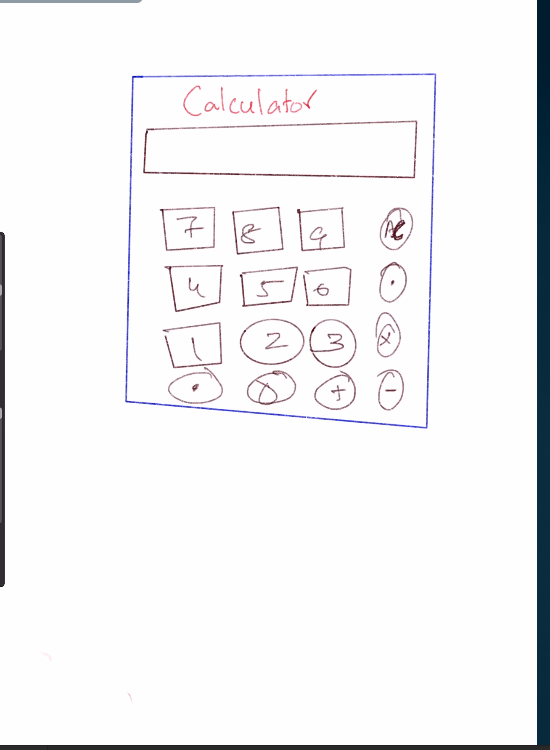

In [53]:

# ss_img.size

get_image()

In [47]:
chat_history=[]
input1  = {
    "messages":  [{
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": "data:image/png;base64,"+ encode_image(LOGDIR+"/img.png"),
          }
        },
        {
          "type": "text",
          "text": "Modify the react app according to the layout in the attached image"
        }
      ]
    }],
    'chat_history':[]
}
result = agent_executor.invoke(input1)




> Entering new AgentExecutor chain...

Invoking: `check_current_code` with `{}`


dict_keys(['App.css', 'App.js', 'index.css'])
{'App.css': '.app-container {\n  display: flex;\n  flex-direction: column;\n  font-family: Arial, sans-serif;\n}\n\n.app-header {\n  background-color: #f8f9fa;\n  padding: 10px;\n  border-bottom: 1px solid #dee2e6;\n  text-align: center;\n}\n\n.app-header h1 {\n  margin: 0;\n  font-size: 2em;\n}\n\n.app-header p {\n  margin: 5px 0 0;\n  font-size: 1.2em;\n  color: #6c757d;\n}\n\n.app-main {\n  display: flex;\n  padding: 20px;\n}\n\n.sidebar {\n  width: 200px;\n  padding-right: 20px;\n}\n\n.sidebar ul {\n  list-style-type: none;\n  padding: 0;\n}\n\n.sidebar li {\n  margin-bottom: 10px;\n}\n\n.content {\n  max-width: 800px;\n}\n\n.content h2,\n.content h3 {\n  margin-top: 0;\n}\n\n.content p {\n  line-height: 1.6;\n}\n\n.content a {\n  color: #007bff;\n  text-decoration: none;\n}\n\n.content a:hover {\n  text-decoration: underline;\n}\n', 'App.js': 'import Re

In [59]:
chat_history=[]
input1  = {
    "messages":  [{
      "role": "user",
      "content": [
        # {
        #   "type": "image_url",
        #   "image_url": {
        #     "url": "data:image/png;base64,"+ encode_image(LOGDIR+"/img.png"),
        #   }
        # },
        {
          "type": "text",
          "text": "Modify the react app to create the default react app"
        }
      ]
    }],
    'chat_history':[]
}
result = agent_executor.invoke(input1)




> Entering new AgentExecutor chain...

Invoking: `check_current_code` with `{}`


dict_keys(['App.css', 'App.js', 'index.css'])
{'App.css': '* {\n  box-sizing: border-box;\n}\n\nbody {\n  font-family: Arial, sans-serif;\n  display: flex;\n  justify-content: center;\n  align-items: center;\n  min-height: 100vh;\n  margin: 0;\n}\n\n.App {\n  text-align: center;\n  border: 1px solid #000;\n  padding: 20px;\n  box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);\n}\n\n.App-header {\n  margin-bottom: 20px;\n}\n\n.search-container {\n  display: flex;\n  justify-content: center;\n  align-items: center;\n}\n\ninput[type="text"] {\n  padding: 10px;\n  font-size: 16px;\n  border: 1px solid #ccc;\n  border-radius: 4px;\n  margin-right: 10px;\n}\n\nbutton {\n  padding: 10px 20px;\n  font-size: 16px;\n  border: 1px solid #ccc;\n  border-radius: 4px;\n  background-color: #f0f0f0;\n  cursor: pointer;\n}\n\nbutton:hover {\n  background-color: #ddd;\n}', 'App.js': 'import React from \'react\';\nimport \'./App.cs